# Decicion Tree explain

In [27]:
%load_ext autoreload
%autoreload 2
%pylab inline

from collections import defaultdict, OrderedDict, Counter
import copy
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import date, datetime
import os

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Load

In [28]:
df_train = pd.read_csv("data/data_clean_train.csv")
df_dev = pd.read_csv("data/data_clean_dev.csv")

# Preprocess

In [29]:
def xy_split(df):
    """
    :param pd.DataFrame df:
    :return:
    """

    feature_names = ['Year', 'city mpg']    
    df_x = df[feature_names]
    
    class_names = ["cheap", "expensive"]
    s_y = (df['MSRP'] > 30000).astype(int)
    s_y = s_y.map(lambda x: class_names[x])

#     s_y = df['MSRP']

    return df_x.values, s_y.values, feature_names

x_train, y_train, feature_names = xy_split(df_train)
x_dev, y_dev, _ = xy_split(df_dev) 

# Fit & eval

In [30]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

model = DecisionTreeClassifier(max_depth=2)
# model = DecisionTreeRegressor(max_depth=2)
model.fit(x_train, y_train)

y_dev_pred = model.predict(x_dev)
acc = accuracy_score(y_dev, y_dev_pred)
acc

0.7821158690176322

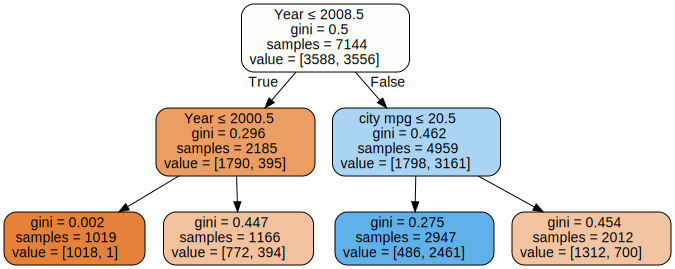

In [31]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(model, out_file=None, 
                         feature_names=feature_names,  
                         #class_names=model.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True, proportion=False)  
graph = graphviz.Source(dot_data)
graph

- nodes - rules
- predction
- probabilities
- node values (class, samples, value)

# Gini impurity

\begin{equation*}
G = 1-\sum_{k=1}^{n}p_k^2
\end{equation*}

k ... třída

n ... počet tříd

# Training algorithm

- looking for rules split_feature <= th
- (split_feature, th) by purest subsets (lowest gini impurity) weighted by size
- [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- regularisation (later)

Advantages:
- requires little preprosessing
- fast

# Regression
- gini -> mse
- prediction: mean value

# Random forest
- more decision trees
- each tree trained on different subset of examples (uses bagging - bootstrap aggregating)
- each node made from random subset of features
- [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [sklearn.ensemble.RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Advantages:
- requires little preprosessing
- quite good results
- fast

# Regularisation
- definuje složitost modelu

In [32]:
def generate_data():
    x = np.random.random(400) * 2 * np.pi
    y = np.sin(x) + np.random.randn(*x.shape)/4
    
    x = x[:, np.newaxis]
    
    return x, y
    

x_train, y_train = generate_data()
x_dev, y_dev = generate_data() 

print(x_train.shape)

(400, 1)


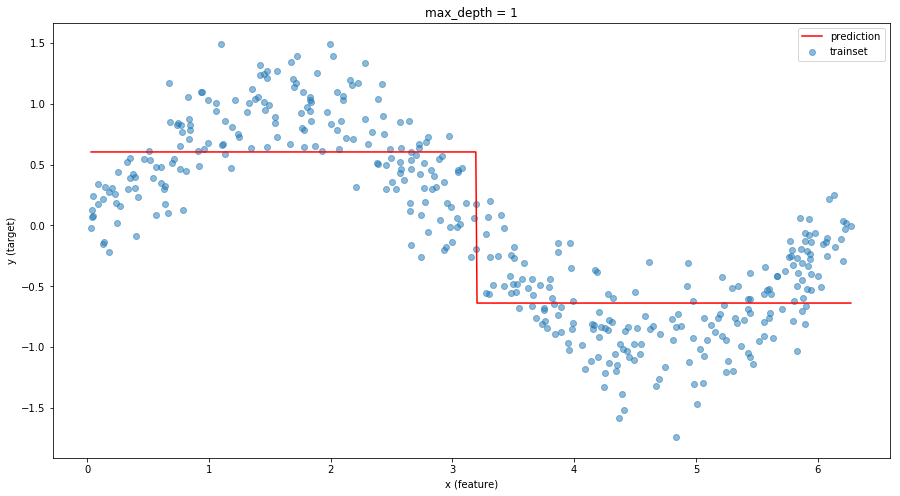

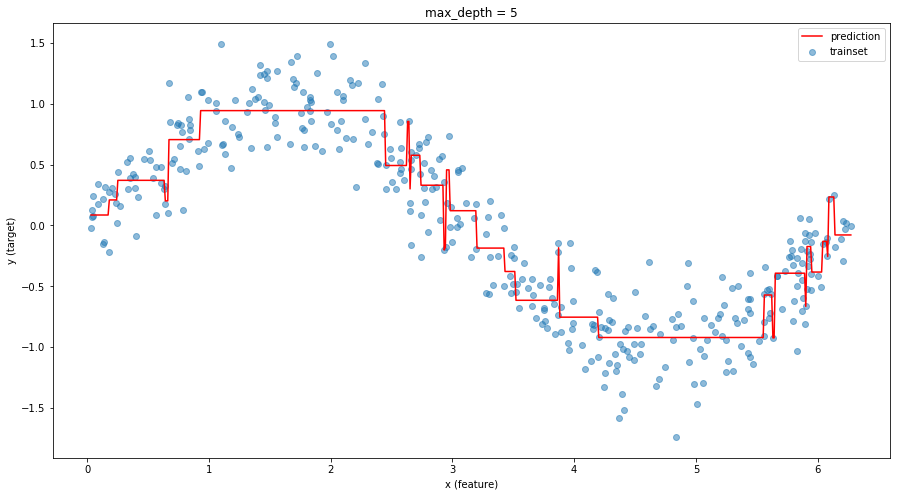

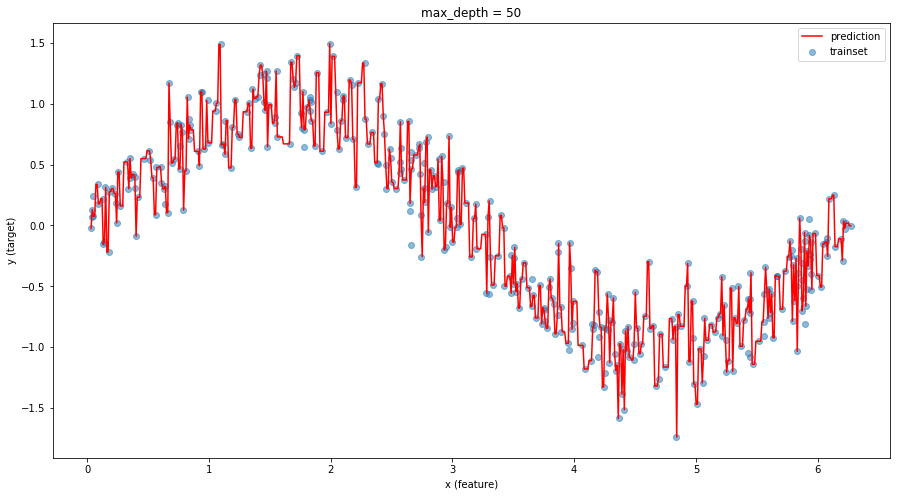

In [33]:
from sklearn.metrics import mean_squared_error
plt.rcParams["figure.figsize"] = (15,8)

max_depths = [1, 5, 50]
for max_depth in max_depths:
    plt.figure()
    
    # train
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    # plot dataset
    plt.scatter(x_train.ravel(), y_train, alpha=0.5, label="trainset")
#     plt.scatter(x_dev.ravel(), y_dev, alpha=0.5, c='green', label="devset")
    plt.xlabel("x (feature)")
    plt.ylabel("y (target)")
    plt.title("max_depth = {}".format(max_depth))

    # plot predictions
    x_test = np.arange(min(x_train.ravel()), max(x_train.ravel()), 0.01)
    x_test = x_test[:, np.newaxis]
    y_test = model.predict(x_test)
    plt.plot(x_test, y_test, 'r', label='prediction')
    plt.legend()

- Jaký model bude nejlšpí a proč?
- max_depth je regularizační parametr
- How do we recognise what is the best value of max_depth?
- Plot devset
- What other regularisation parameters has DecisionTree, RandomForest?

Text(0, 0.5, 'rmse')

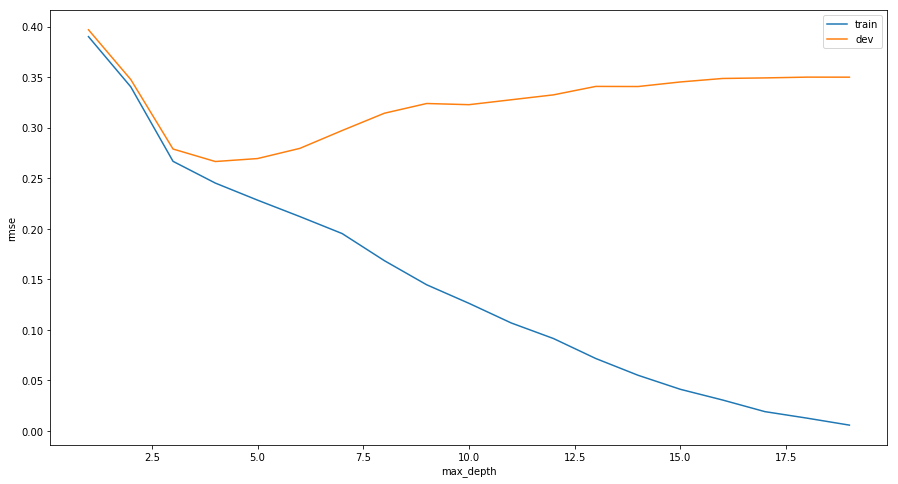

In [34]:
from sklearn.metrics import mean_squared_error

max_depths = range(1, 20)
rmse_train, rmse_dev = [], []
for max_depth in max_depths:
    
    # train
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    # calculate metric
    y_train_pred = model.predict(x_train)
    y_dev_pred = model.predict(x_dev)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_dev.append(np.sqrt(mean_squared_error(y_dev, y_dev_pred)))
    
plt.figure()
plt.plot(max_depths, np.array([rmse_train, rmse_dev]).T)
plt.legend(["train", "dev"])
plt.xlabel("max_depth")
plt.ylabel("rmse")

- Kde je nejlepší model?
- Overfitting (high variance), underfitting (high bias)
- Co je za problém s grafy pro reálnou úlohu?
  - Více featur, více hyperparametrů
- Jak vyřešit problém více hyperparametrů?
  - [Grid search, Random serach](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py)
  - [Bayesian Hyperparameter Optimisation](https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f)